# Building Neural Networks 3 different ways with different levels of customization

## Setup

In [355]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("FashionMNIST-NN-Optimization"):
    raise ValueError("Please change working directory to 'path/FashionMNIST-NN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/FashionMNIST-NN-Optimization


In [356]:
!pip install -r requirements.txt

In [357]:
import zipfile
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Fetch data

In [358]:
with zipfile.ZipFile("data/fashion_mnist_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [359]:
fmnist_train = pd.read_csv("data/fashion_mnist_train.csv")
fmnist_test = pd.read_csv("data/fashion_mnist_test.csv")

## Separating labels and data splitting

In [360]:
fmnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
fmnist_train.notnull().any(axis=1).value_counts()

True    60000
Name: count, dtype: int64

In [362]:
y_train_valid = fmnist_train["label"]
X_train_valid = fmnist_train.drop("label", axis=1)
y_test = fmnist_test["label"]
X_test = fmnist_test.drop("label", axis=1)

In [363]:
len(X_train_valid)

60000

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/12, stratify=y_train_valid)

In [365]:
len(X_train), len(X_valid)

(55000, 5000)

In [366]:
y_train.value_counts()

label
9    5500
6    5500
4    5500
5    5500
2    5500
0    5500
7    5500
8    5500
1    5500
3    5500
Name: count, dtype: int64

In [367]:
fmnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
labels = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

## Scaling data

In [369]:
X_train /= 255
X_valid /= 255
X_test /= 255

## Dataset analysis

In [370]:
X_train.shape

(55000, 784)

In [371]:
input_shape = X_train.shape[1]
img_len = int(np.sqrt(input_shape))

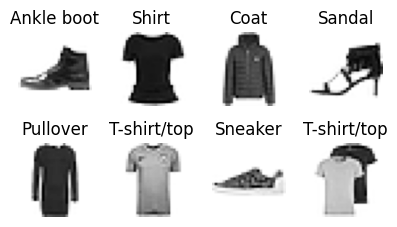

In [372]:
n_rows = 2
n_cols = 4
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        image = X_train.iloc[index].to_numpy().reshape(img_len, img_len)
        plt.imshow(image, cmap="Greys")
        plt.axis('off')
        plt.title(labels[y_train.iloc[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Sequential API

In [373]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(input_shape, )),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [374]:
X_train.shape

(55000, 784)

## Model analysis

In [375]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [376]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [377]:
dense = model.get_layer("dense")
weights, biases = dense.get_weights()

weights

array([[-1.8063180e-02, -2.1914542e-02,  4.1271076e-02, ...,
         5.8402643e-03,  6.3633144e-02,  4.0702343e-02],
       [-1.7620191e-02, -5.9774674e-02, -5.2228779e-02, ...,
        -6.9058001e-02, -4.5843776e-02,  6.3592628e-02],
       [ 1.8644825e-02, -7.3180951e-02,  6.5976992e-02, ...,
        -5.2874163e-03, -2.8433427e-03,  7.9962507e-02],
       ...,
       [ 7.8662708e-02, -7.7715568e-02,  1.3739526e-02, ...,
        -4.2070732e-02, -5.2544981e-02,  5.4562092e-04],
       [-7.0429005e-02, -8.4551126e-03, -8.0231495e-02, ...,
        -3.2048330e-02,  3.9964952e-02,  5.2742660e-05],
       [-7.7302076e-02,  9.9100918e-04, -5.5312604e-02, ...,
         7.9426438e-02, -4.8840605e-02,  9.2681497e-04]], dtype=float32)

In [378]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Training the model

In [379]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [380]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.6376 - loss: 1.0891 - val_accuracy: 0.8066 - val_loss: 0.5584
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8160 - loss: 0.5394 - val_accuracy: 0.8306 - val_loss: 0.4844
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.8344 - loss: 0.4781 - val_accuracy: 0.8430 - val_loss: 0.4512
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.8442 - loss: 0.4456 - val_accuracy: 0.8484 - val_loss: 0.4302
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8522 - loss: 0.4234 - val_accuracy: 0.8532 - val_loss: 0.4142
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8591 - loss: 0.4064 - val_accuracy: 0.8552 - val_loss: 0.4023
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.8633 - loss: 0.3927 - val_accuracy: 0.8598 - val_loss: 0.3913
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8672 -